# Results From CMSE 401 Quantum Project


By: Ricardo Pina

## I used dev-amd20 for all computations

## Directions
https://github.com/softwareQinc/qpp

The following three commands are used in each directory of this project. There are three directories Omp, Omp_max, and Serial. 

 - Serial examines 12 simulated Qubits run a simulated Quantum Circuit on the HPCC. According to the documentation on the Quantum++ github, "The library's simulation capabilities are only restricted by the amount of available physical memory.". Using this information I tried taking advantage of the supercomputers capabilities by using as much RAM as possible in the configuration settings of the SBATCH files.
 
 
 - Omp, does the same as serial, but now also tries to take advantage of the HPCCC through parallel processing. This was done through the OpenMP software, which allowed me run the main loop in the program in parallel with #pragma omp for schedule(static).
 
 
 - Omp_max, this is an added directory in this project, to try and see how big the program can get. I tried 15 Qubits and 50 cores. the program ran for Two hours on the HPCC.

# For each Directory:
    sbatch run.sb
    sbatch run_omp.sb
    sbatch run_omp_max.sb
    
The Simulated algorithm is Grovers Algorithm, it is a quantum algorithm that finds an item in an itemized list faster than its serial counterpart.

In [150]:
import os
import numpy as np
import matplotlib.pyplot as plt 

In [151]:
def times_extract(times):
    time_list = []
    while(True):
        line = times.readline()
        if not line:
            break
        if 'real' in line:
            time_list.append(float(line.strip()[7:12]))
    times.close
    return time_list

In [152]:
def times(n = 1, t_dir = 'serial'):
    
    cwd = os.getcwd()
    t = []
    
    for x in range(0,n):
        y = x + 1
        plate_size = 'time_{'+ f'{y*25}' + '}' + '.txt'
        time_file = os.path.join(cwd, t_dir + plate_size)
        t += [(sum(times_extract(open(time_file, 'r')))/25)]
    
    return t

In [156]:
def graph_results(t_dir = 'serial', n=1):
    
    cwd = os.getcwd()

    time_file = os.path.join(cwd, t_dir)
    t = times_extract(open(time_file, 'r'))
    
    plt.violinplot(t, showmeans=True, showmedians=False)
    plt.title(t_dir + " Run")
    plt.ylabel("Seconds (s)")
    #plt.xlabel("")

    plt.show()

## Serial Experiment

I compiled the serial code on dev-amd20 using the following commands:

sbatch run.sb

which has these important commands

    #!/bin/bash --login

    #SBATCH --time=00:12:00
    #SBATCH --mem=100G
    #SBATCH -N 1
    #SBATCH -c 1
    
The Serial Program ran decently quick, with a median of about 56 seconds per run. Lets look at the display outlook of one of the algorithms after it has found its item.

'''
1
>> Grover on n = 12 qubits
>> Database size: 4096
>> Marked state: 3881 -> [1 1 1 1 0 0 1 0 1 0 0 1]
>> We run 51 queries
>> Probability of the marked state: 0.998507
>> Let's sample...
>> Hooray, we obtained the correct result: 3881 -> [1 1 1 1 0 0 1 0 1 0 0 1]
>> Run time: 41.8201 seconds
'''

Almost all outputs look like this in this example. What is important to note is the probability of this marked state being the marked state we need to find.

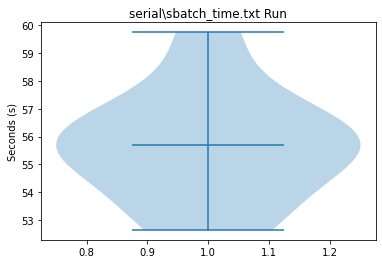

In [157]:
graph_results('serial\\sbatch_time.txt')

## OMP Speedup

    #!/bin/bash --login

    #SBATCH --time=00:12:00
    #SBATCH --mem=100G
    #SBATCH -N 1
    #SBATCH -c 10

'''
1
>> Grover on n = 12 qubits
>> Database size: 4096
>> Marked state: 256 -> [0 0 0 1 0 0 0 0 0 0 0 0]
>> We run 51 queries
>> Probability of the marked state: 0.00023636
>> Let's sample...
>> Not there yet... we obtained: 3407 -> [1 1 0 1 0 1 0 0 1 1 1 1]
>> Run time: 5.16017 seconds
'''

I chose ten cores, as I felt that it was a low enough setting to request from the HPCC, and large enough to see a reasonable speedup.
When comparing the speedup, we can see from the graph below that there was around a 3 times speedup, with ten cores running, thats about .33 speedup for each core, with diminishing returns.
unfortunately most Grovers algorithms fail when looking for their marked states.

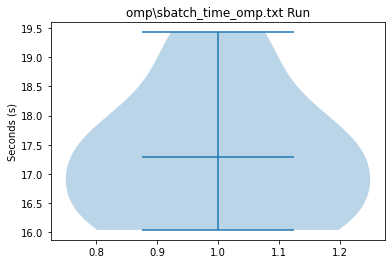

In [158]:
graph_results('omp\\sbatch_time_omp.txt')

## OMP Max

    #!/bin/bash --login

    #SBATCH --time=02:00:00
    #SBATCH --mem=100G
    #SBATCH -N 1
    #SBATCH -c 50


'''
1
>> Grover on n = 14 qubits
>> Database size: 16384
>> Marked state: 14782 -> [1 1 1 0 0 1 1 0 1 1 1 1 1 0]
>> We run 101 queries
>> Probability of the marked state: 5.98585e-05
>> Let's sample...
>> Not there yet... we obtained: 15020 -> [1 1 1 0 1 0 1 0 1 0 1 1 0 0]
>> Run time: 61.1339 seconds
'''

I tried running 15 states and I think I was requesting too much from the HPCC and it would not run, 14 states shows that a probability of finding a state with this configuration is basically 0.

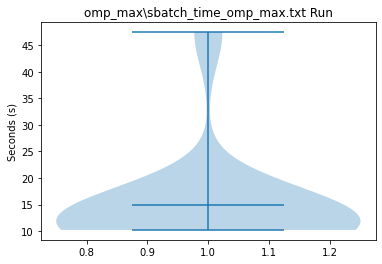

In [159]:
graph_results('omp_max\\sbatch_time_omp_max.txt')

## Concluding Discussion

I discovered that although I got a big program to run faster on the HPCC I was not able to keep it giving a succesful result. In order to fix this some memory has to be shared between threassds that Hasn't already been shared. 
It was really cool to see however a quantum simulation and seeing how such a powerful device can barely keep up.